# In-class Assignment 4 - K-Means Clustering <Hr>

## Submitted by: Aarjeyan Shrestha C0927422 <hr>

### About Dataset
##### Context
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Number of Instances: 740 

Number of Attributes: 21

Missing Values: 0

Dataset :[https://archive.ics.uci.edu/dataset/445/absenteeism+at+work](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

## Features in the Dataset (Columns)
1. Individual identification (ID)
2. Reason for absence (ICD). (Target) (Explained below)
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours


## 1. Importing Libraries

In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px


## 2. Loading the dataset

In [2]:
# importing the dataset
df = pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

## 3. Data Preperation

In [3]:
# defining categorical attributes
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
#defining the numerical  attributes 
numerical_atts = df.drop(columns=categorical_atts).columns.to_list()

### **3.1 Checking Unique Categories in each Column:**

In [4]:
# checking the unique values in categorical attributes
df[categorical_atts].nunique()

Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

### **3.2 Checking Missing Values**

In [5]:
# checking the null value in the dataset
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


### **3.3 Numerical data Visualization**

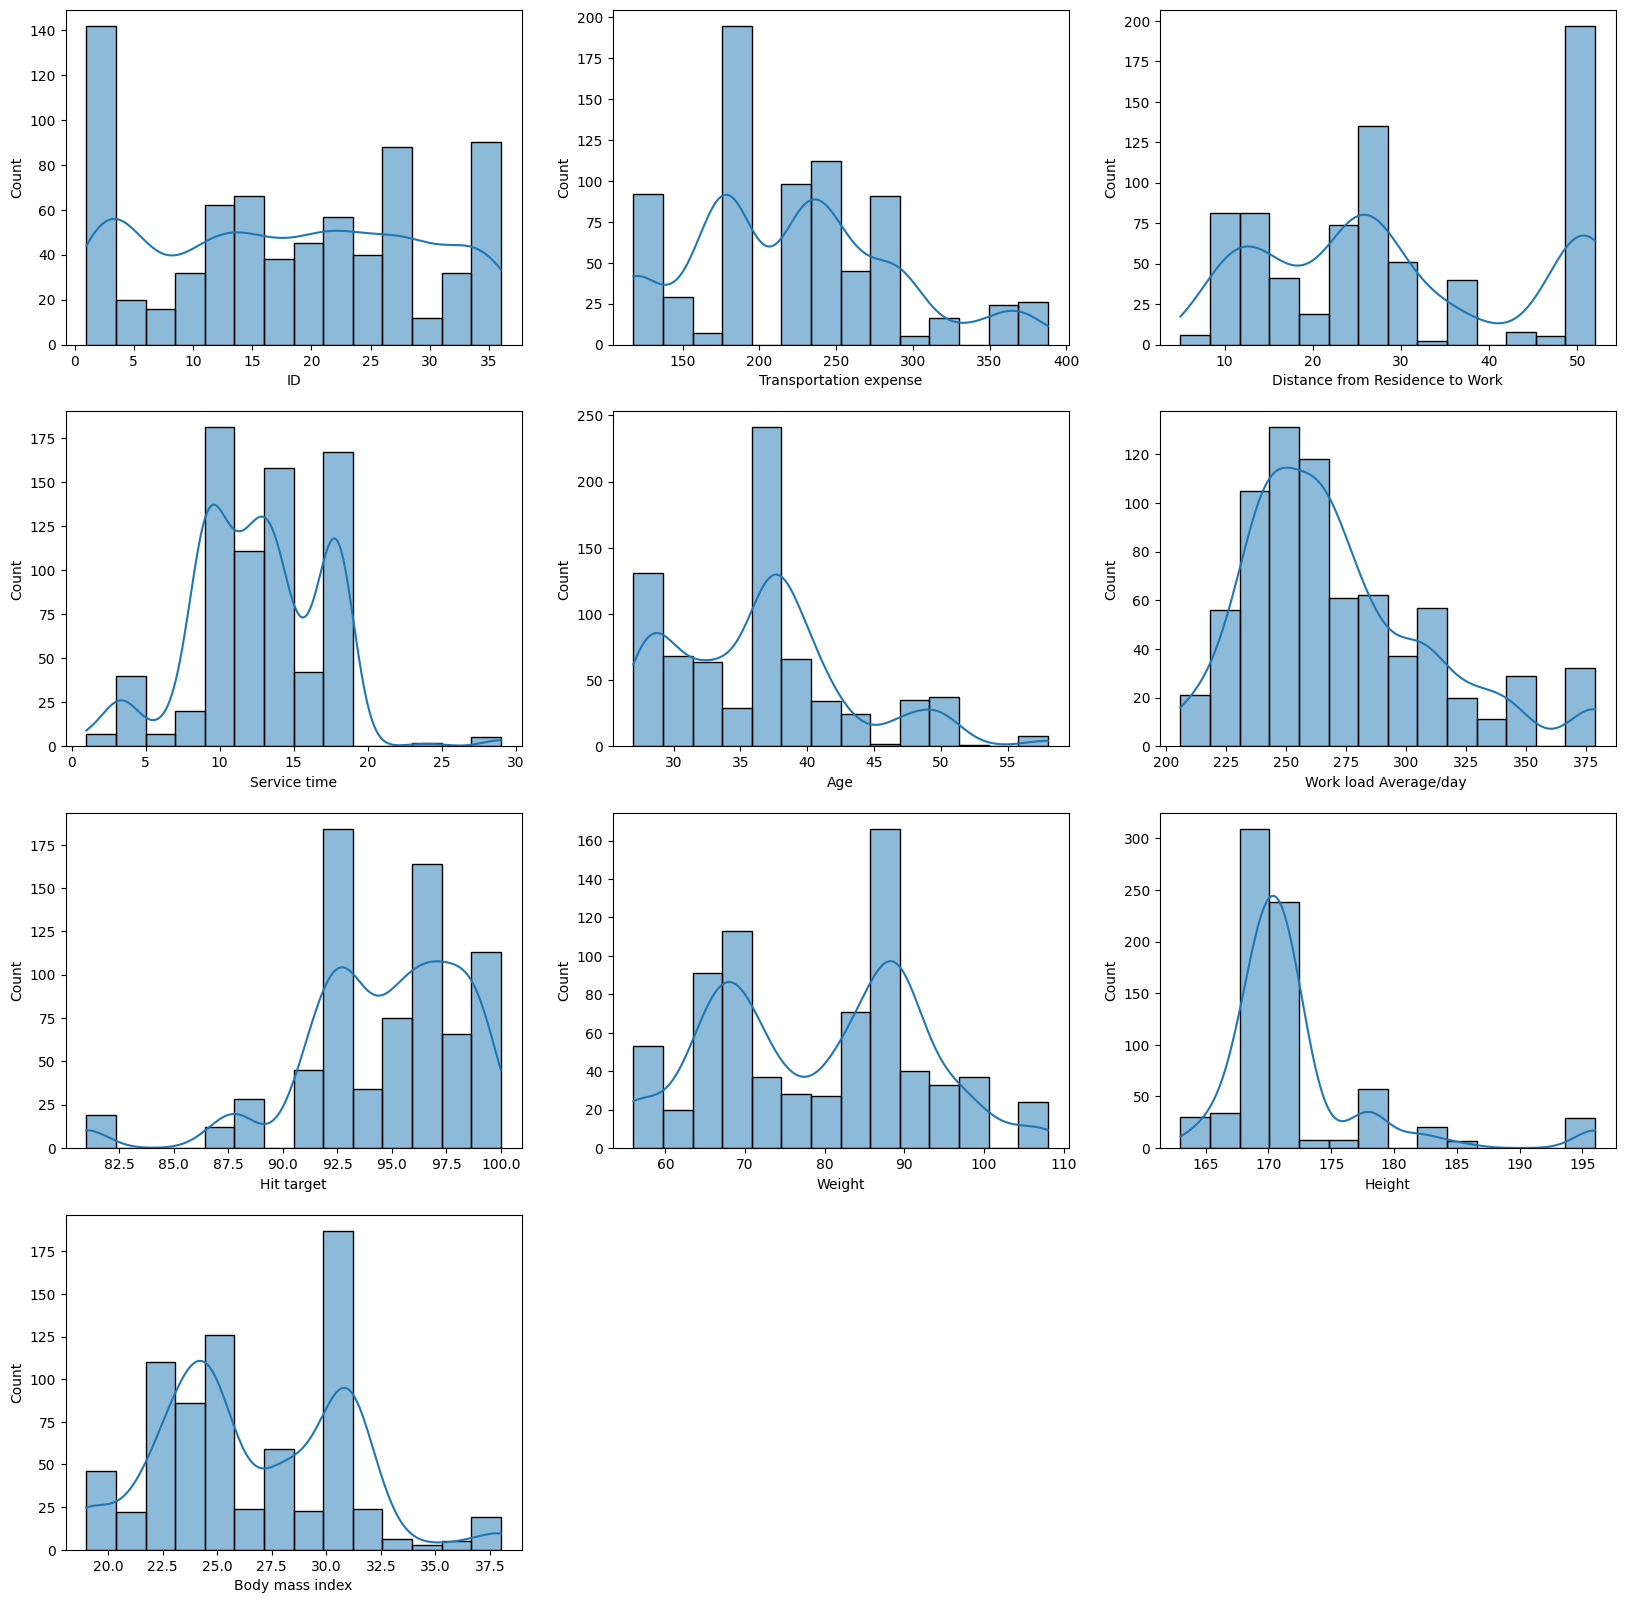

In [7]:
num_df = df[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(4, 3, i)
    sns.histplot(num_df[num_df.columns[i-1]],bins=14, kde=True)

In [8]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

### **3.4 Outlier Removal**

In [9]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(df[num_att], [75,25])
    MEAN = df[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=df.drop(df.loc[df[num_att]< minimum,num_att].index) 
    data_clean=df.drop(df.loc[df[num_att]> maximum,num_att].index) 

### **3.5 Feature Scaling using MinMaxScaler and Column Transformer**

`MinMaxScaler` ensures that the dataset is appropriately normalized and `Column Transformer` ensures that each feature is transformed . Both improve the quality and performance of the analysis.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()

numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)

## 4. K-Means Clustering

#### For the clear visualization I used ``t-SNE`` which works well with the K-Means Clustering to illustrate the distribution and quality of clusters. t-SNE is an dimensional reduction technique that reduces the high dimensional data into 2D map.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px

In [12]:
clusters = []

for i in range(1, 23):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)

### **4.1 Testing for 2 Clusters**

In [13]:
# KMeans clustering
km2 = KMeans(n_clusters=2, random_state=42).fit(df)

# t-SNE for dimensionality reduction to 2D
X_embedded = TSNE(n_components=2, perplexity=10, random_state=24).fit_transform(df)
colors = np.array(['blue', 'green'])

# Plot using Plotly
fig = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=[colors[label] for label in km2.labels_])
fig.update_layout(
    title="2D Scatter Plot of Clusters",
    xaxis_title="TSNE Component 1",
    yaxis_title="TSNE Component 2",
    legend_title="Cluster"
)
fig.show()

In [14]:
km2 = KMeans(n_clusters=2).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

### **4.2 Testing for 3 Clusters**

In [15]:
# KMeans clustering
km2 = KMeans(n_clusters=3, random_state=42).fit(df)

# t-SNE for dimensionality reduction to 2D
X_embedded = TSNE(n_components=2, perplexity=10, random_state=24).fit_transform(df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

# Plot using Plotly
fig = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=[colors[label] for label in km2.labels_])
fig.update_layout(
    title="2D Scatter Plot of Clusters",
    xaxis_title="TSNE Component 1",
    yaxis_title="TSNE Component 2",
    legend_title="Cluster"
)
fig.show()

In [16]:
km2 = KMeans(n_clusters=3).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

### **4.3 Testing for 4 Clusters**

In [17]:
# KMeans clustering
km2 = KMeans(n_clusters=4, random_state=42).fit(df)

# t-SNE for dimensionality reduction to 2D
X_embedded = TSNE(n_components=2, perplexity=10, random_state=24).fit_transform(df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

# Plot using Plotly
fig = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=[colors[label] for label in km2.labels_])
fig.update_layout(
    title="2D Scatter Plot of Clusters",
    xaxis_title="TSNE Component 1",
    yaxis_title="TSNE Component 2",
    legend_title="Cluster"
)
fig.show()

In [18]:
km2 = KMeans(n_clusters=4).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

### **4.4 Testing for 5 Clusters**

In [19]:
# KMeans clustering
km2 = KMeans(n_clusters=5, random_state=42).fit(df)

# t-SNE for dimensionality reduction to 2D
X_embedded = TSNE(n_components=2, perplexity=10, random_state=24).fit_transform(df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

# Plot using Plotly
fig = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=[colors[label] for label in km2.labels_])
fig.update_layout(
    title="2D Scatter Plot of Clusters",
    xaxis_title="TSNE Component 1",
    yaxis_title="TSNE Component 2",
    legend_title="Cluster"
)
fig.show()

In [20]:
km2 = KMeans(n_clusters=5).fit(df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( df)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

## **Elbow Method Validation for optimal number of cluster**

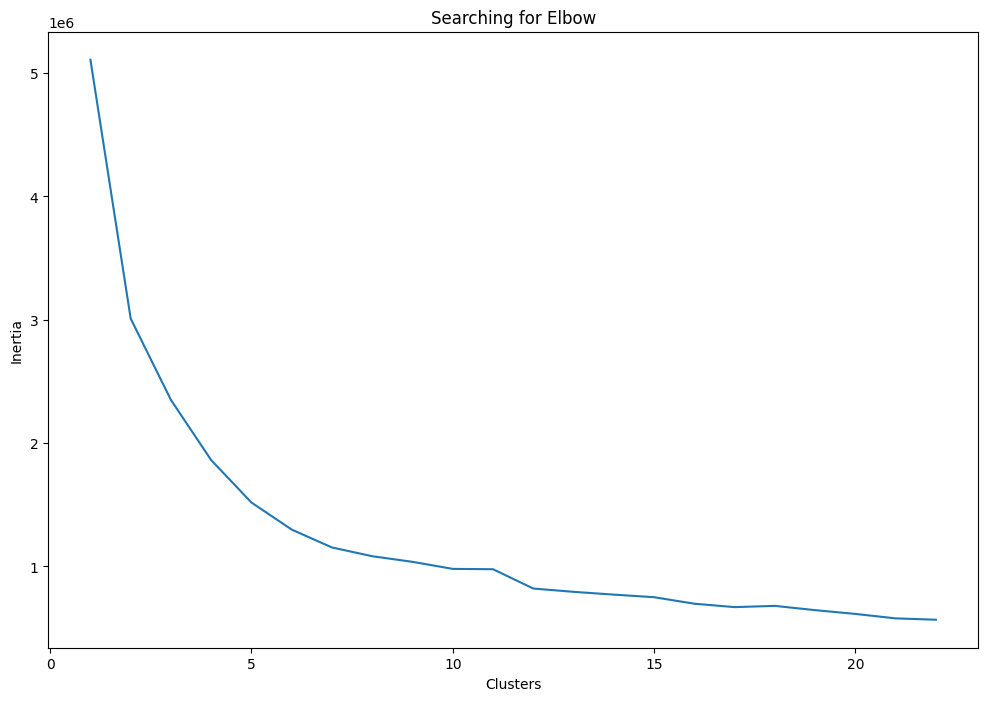

In [21]:
clusters = []

for i in range(1, 23):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 23)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

The Elbow method is used to validate the optimal "K" value for clustering. Based on the Elbow method results, it appears that K = 2 or 3 would be ideal for clustering the data points in this dataset. This is consistent with the analysis presented above. Therefore, for the "Absenteeism at work" dataset, the best choice for K is:
### **`K = 3`**